# 00 EDA Favorita

import os, pathlib, sys
print("Notebook CWD →", pathlib.Path().absolute())


In [6]:
import pathlib, os
pathlib.Path("data/raw").mkdir(parents=True, exist_ok=True)
print("Folders now:", list(pathlib.Path("data").iterdir()))


Folders now: [PosixPath('data/raw')]


In [7]:
import pandas as pd, numpy as np
rng = pd.date_range("2022-01-01", periods=180)

df = (pd.DataFrame({
        "date": np.repeat(rng, 6),
        "store_nbr": np.tile(np.repeat([1,2], 3), len(rng)),
        "item_nbr":  np.tile([101,102,103]*2, len(rng)),
        "onpromotion": np.random.binomial(1, 0.15, len(rng)*6)
     })
     .assign(unit_sales=lambda d: np.random.poisson(20 + 8*d["onpromotion"]))
)
df.to_csv("data/raw/favorita_subset.csv", index=False)
print("Saved", len(df), "rows")


Saved 1080 rows


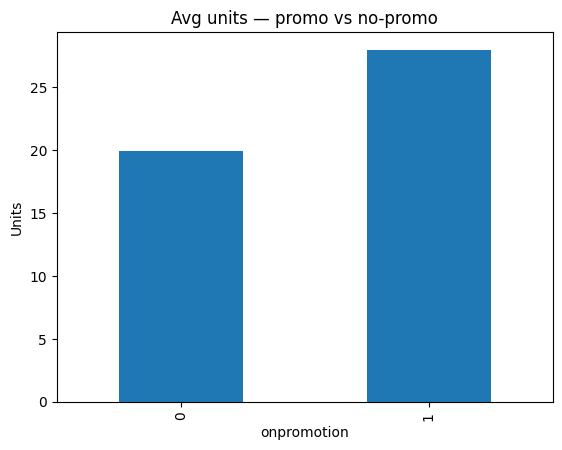

In [8]:
import pandas as pd, matplotlib.pyplot as plt
df = pd.read_csv("data/raw/favorita_subset.csv", parse_dates=["date"])
df.groupby("onpromotion")["unit_sales"].mean().plot.bar()
plt.title("Avg units — promo vs no-promo"); plt.ylabel("Units"); plt.show()
